<a href="https://colab.research.google.com/github/Zenith1618/LLM/blob/main/VanillaRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
X, y = [], []
total_size = 250
time_steps = 25
sin_wave = np.sin(np.arange(total_size))
for step in range(sin_wave.shape[0]-time_steps):
    X.append(sin_wave[step:step+time_steps])
    y.append(sin_wave[step+time_steps])

This code defines a function that generates training data for a time series forecasting problem. Let's break it down step by step:

1. `X, y = [], []`: This line initializes two empty lists, `X` and `y`, which will be used to store the input and output data for the time series model.

2. `total_size = 250`: `total_size` is set to 250, indicating the total number of data points in the time series.

3. `time_steps = 25`: `time_steps` is set to 25, indicating the number of time steps to be used as input for the model. The goal is to predict the next value in the time series based on the previous 25 time steps.

4. `sin_wave = np.sin(np.arange(total_size))`: This line creates a sine wave signal with 250 data points. The `np.sin` function from the NumPy library is used to generate a sine wave, and `np.arange(total_size)` creates an array of values from 0 to 249 to represent the time steps.

5. The following loop generates training data:

   ```
   for step in range(sin_wave.shape[0] - time_steps):
       X.append(sin_wave[step:step + time_steps])
       y.append(sin_wave[step + time_steps])
   ```

   - The loop iterates over each time step, up to the point where you can no longer create a complete input sequence of 25 time steps (i.e., `sin_wave.shape[0] - time_steps`).

   - For each iteration of the loop, it extracts a slice of the sine wave signal with a length of `time_steps` starting from the current `step` and appends it to the `X` list. This slice is used as the input data.

   - It also extracts the value at the time step immediately following the input sequence and appends it to the `y` list. This value is the target output.

After running this code, the `X` list will contain input sequences of 25 time steps each, and the `y` list will contain the corresponding target values that the model should predict. These lists can be used for training a time series forecasting model, such as a recurrent neural network (RNN) or a long short-term memory (LSTM) network, to predict future values in the sine wave time series based on the provided historical data.

Text(0.5, 1.0, 'Sine wave')

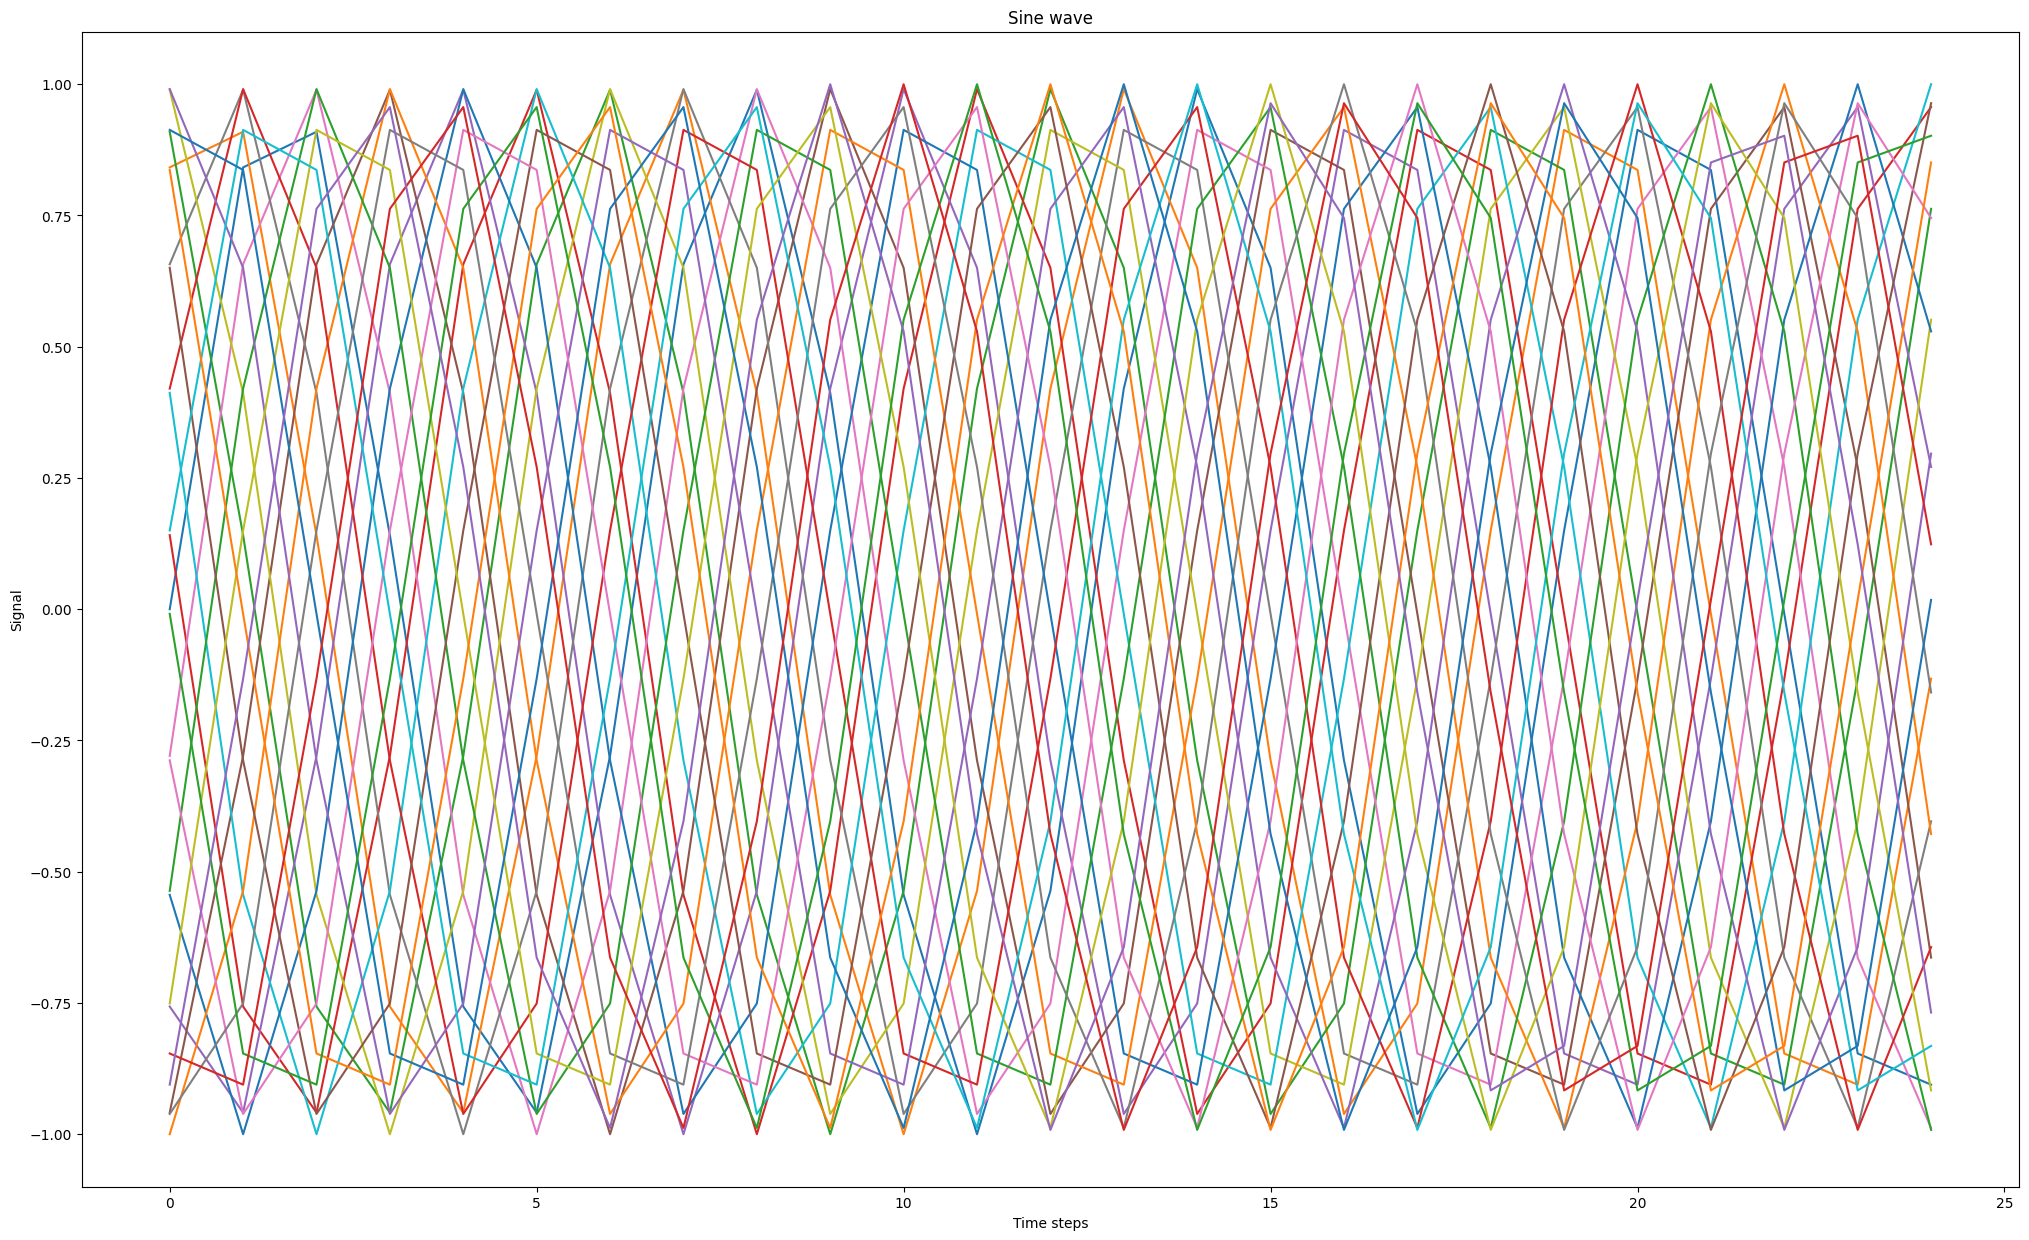

In [58]:
# 1 timestamp

plt.figure(figsize=(25,15))
plt.plot(X[:25])
plt.xlabel("Time steps")
plt.ylabel("Signal")
plt.title("Sine wave")

Text(0.5, 1.0, 'Sine wave')

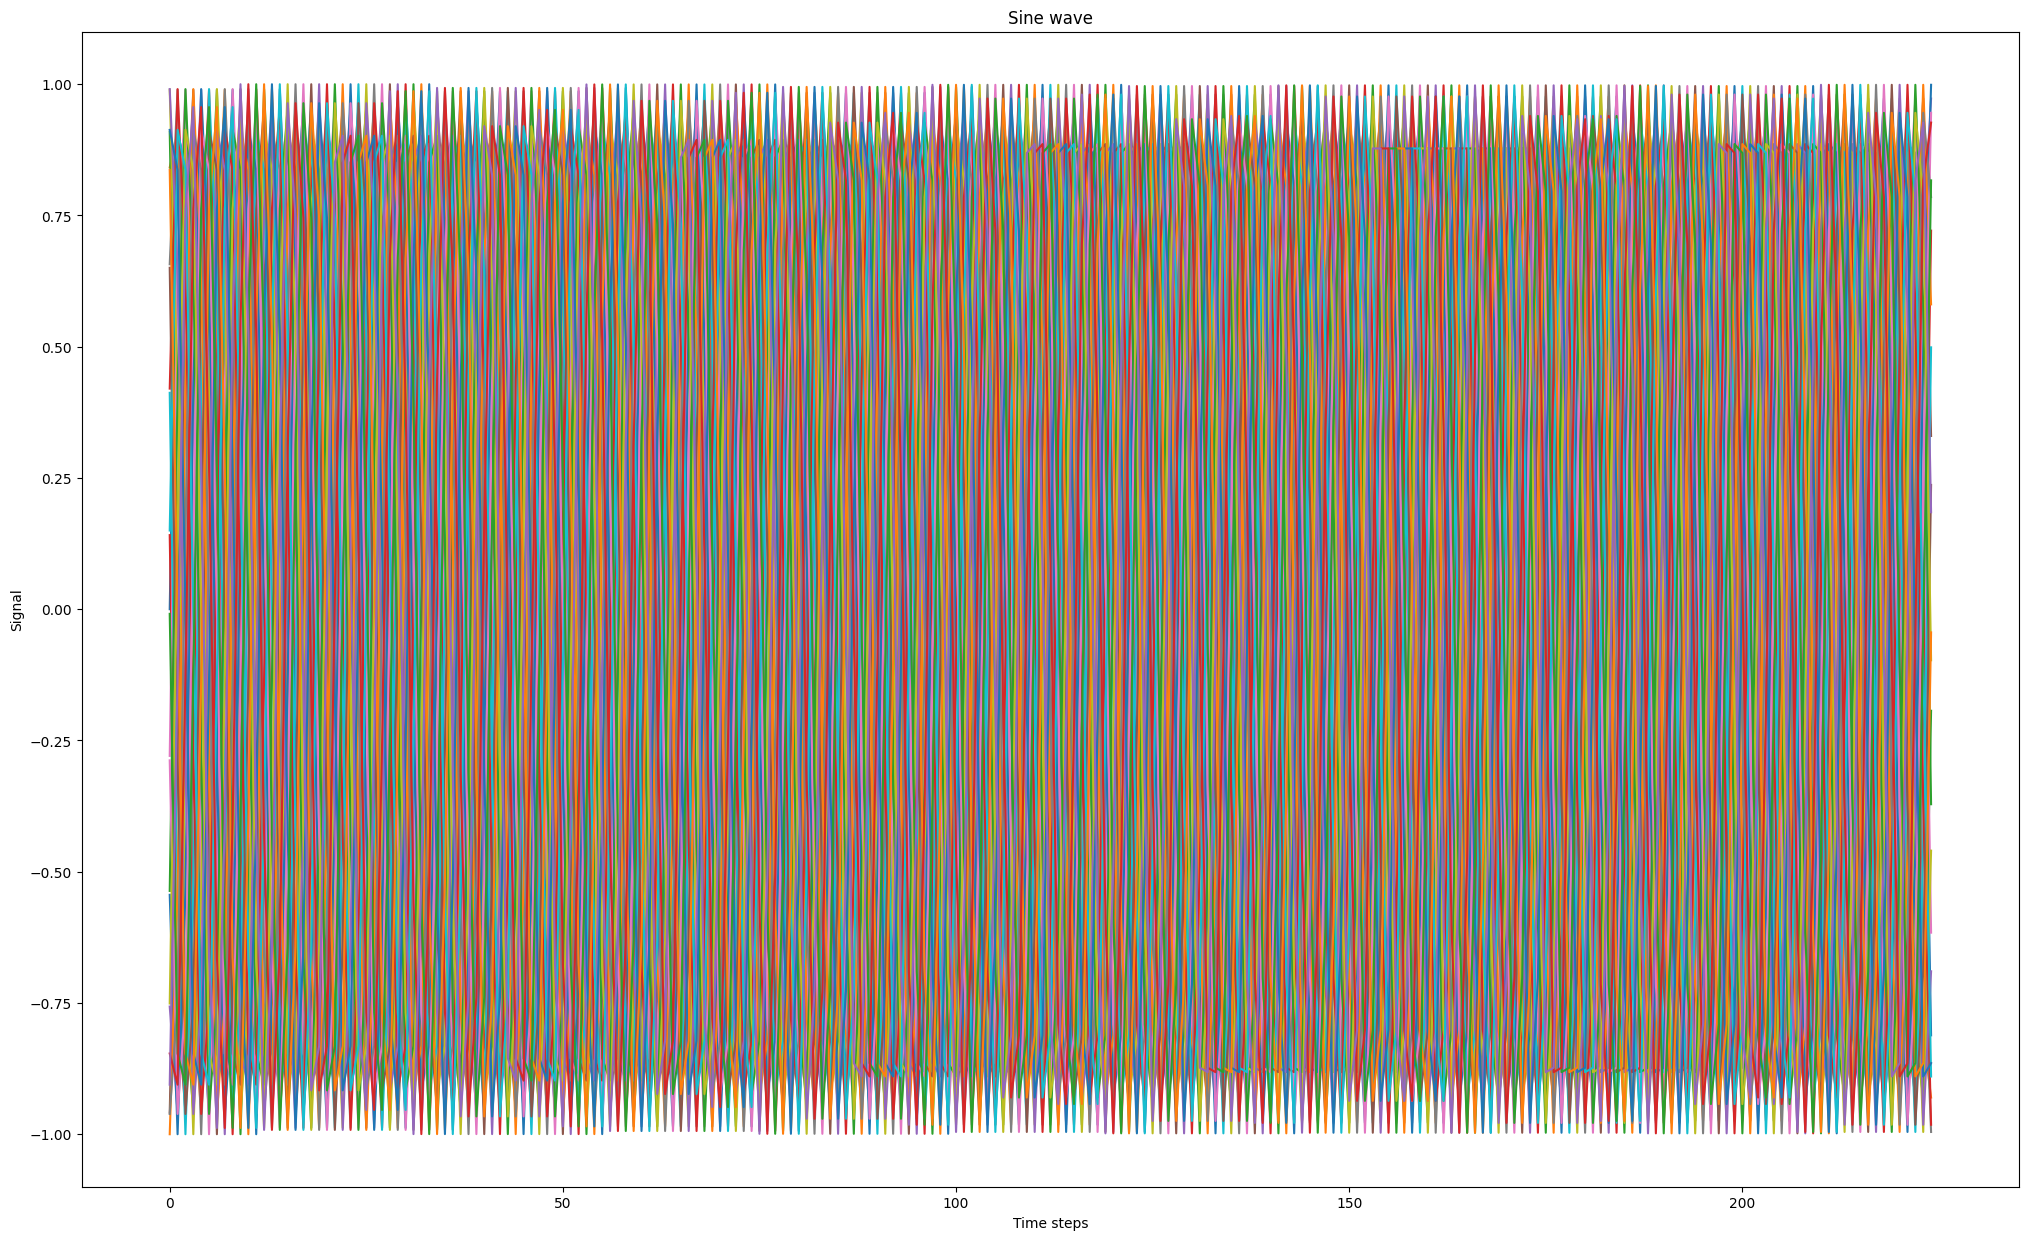

In [59]:
plt.figure(figsize=(25,15))
plt.plot(X)
plt.xlabel("Time steps")
plt.ylabel("Signal")
plt.title("Sine wave")

Text(0.5, 1.0, 'Sine wave')

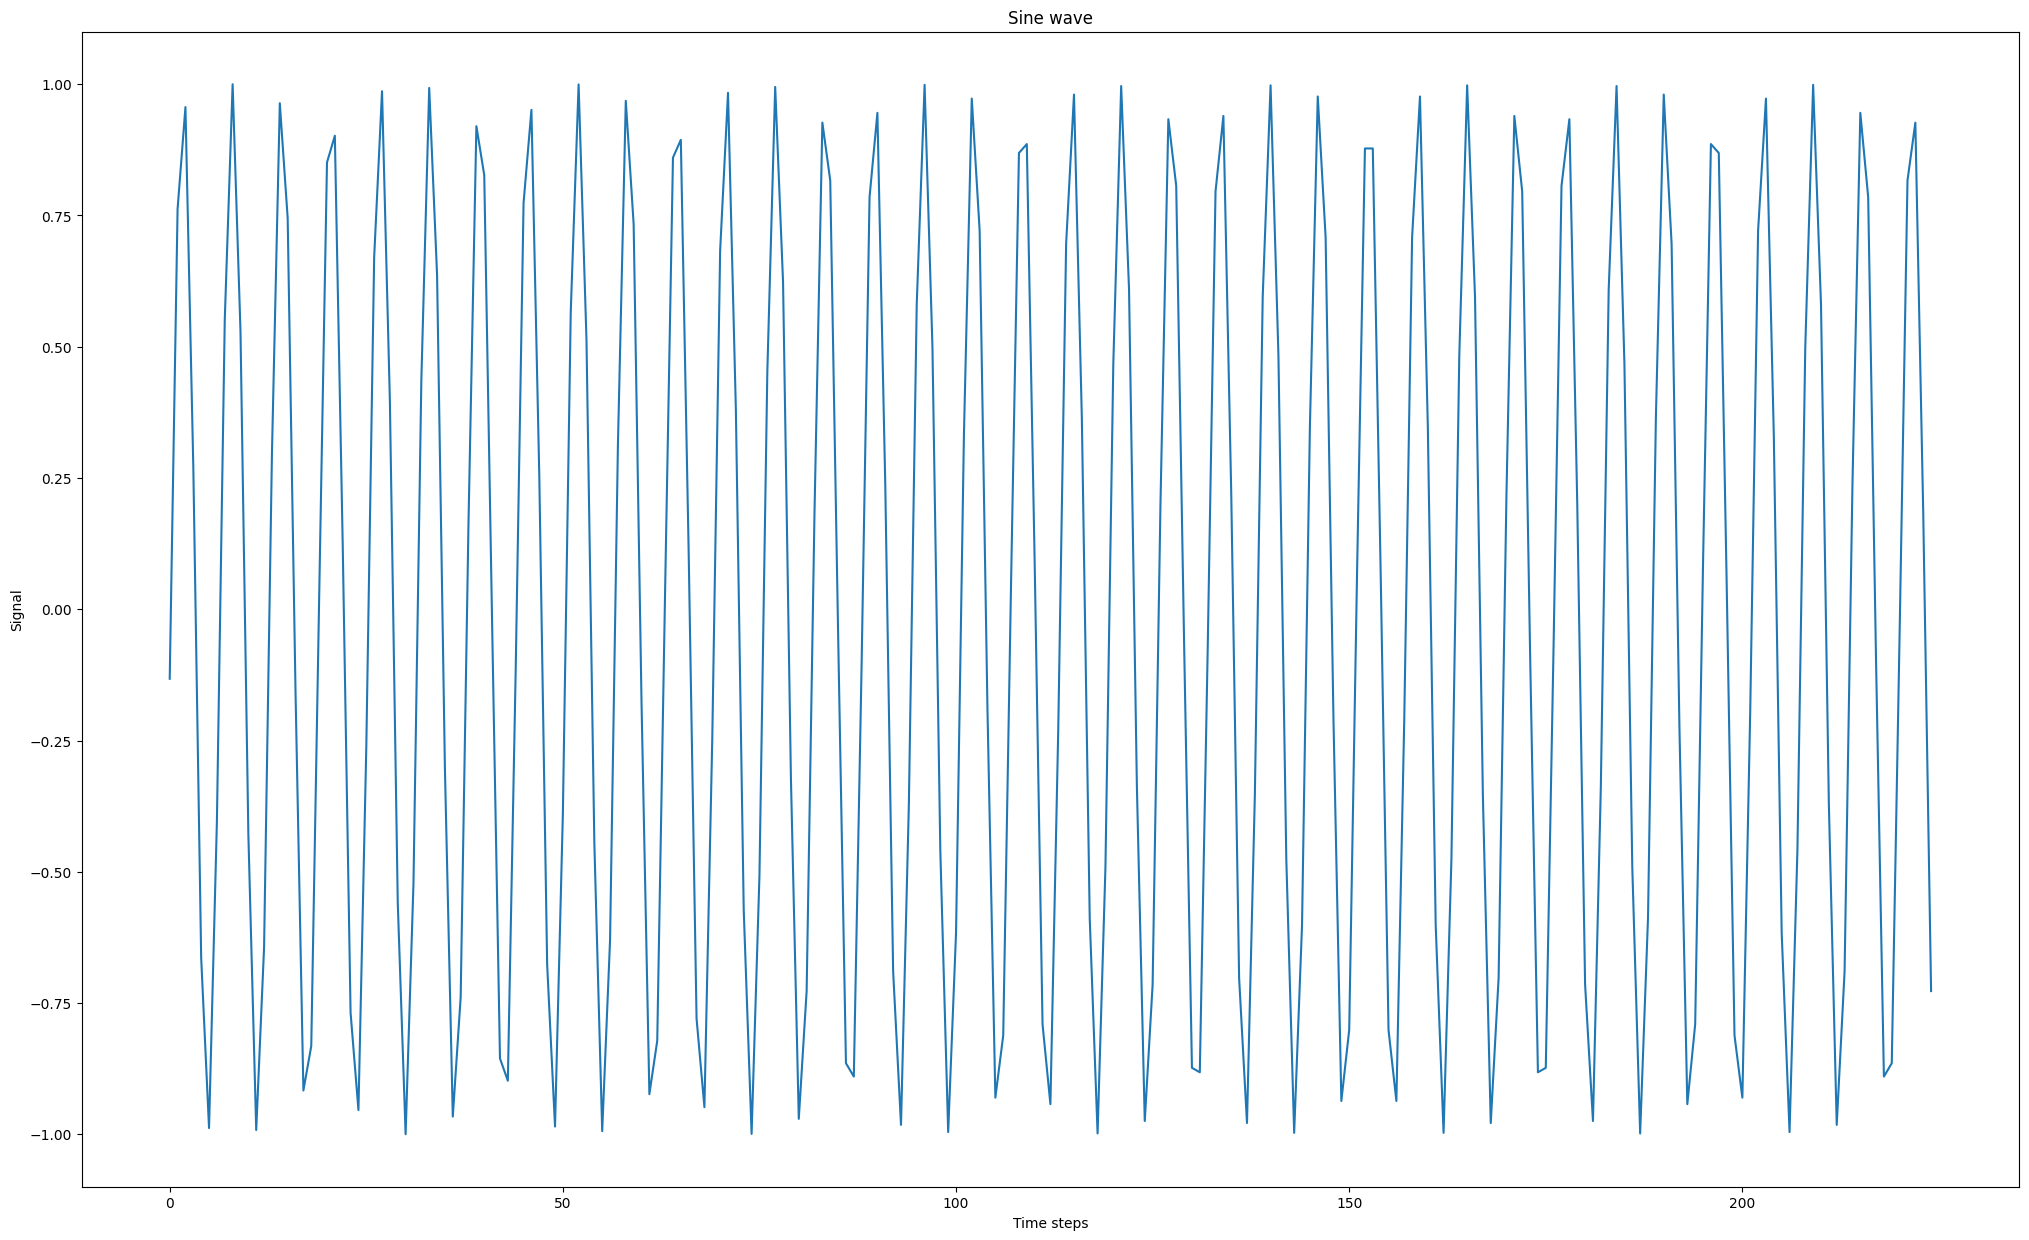

In [60]:
plt.figure(figsize=(25,15))
plt.plot(y)
plt.xlabel("Time steps")
plt.ylabel("Signal")
plt.title("Sine wave")

In [61]:
X = np.array(X).reshape(len(y),time_steps,1)
X.shape

(225, 25, 1)

In [80]:
X[0]

array([[ 0.        ],
       [ 0.84147098],
       [ 0.90929743],
       [ 0.14112001],
       [-0.7568025 ],
       [-0.95892427],
       [-0.2794155 ],
       [ 0.6569866 ],
       [ 0.98935825],
       [ 0.41211849],
       [-0.54402111],
       [-0.99999021],
       [-0.53657292],
       [ 0.42016704],
       [ 0.99060736],
       [ 0.65028784],
       [-0.28790332],
       [-0.96139749],
       [-0.75098725],
       [ 0.14987721],
       [ 0.91294525],
       [ 0.83665564],
       [-0.00885131],
       [-0.8462204 ],
       [-0.90557836]])

In [62]:
y = np.array(y).reshape(len(y),1)
y.shape

(225, 1)

In [78]:
y[0]

array([-0.13235175])

In [63]:
X.shape[2]

1

In [64]:
class VanillaRNN:
    def __init__(self, input_size,hidden_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.Wx = np.random.randn(self.hidden_size, self.input_size.shape[2])
        self.Wh = np.random.randn(self.hidden_size, self.hidden_size)
        self.Wy = np.random.randn(self.output_size.shape[1],self.hidden_size)

    def activation(self, xt, ht_1):
        ht = np.tanh(np.dot(self.Wx,xt.reshape(1,1)) + np.dot(self.Wh,ht_1))
        yt = np.dot(self.Wy,ht)
        return ht, yt

    def forward(self, sample):
        sample_input, sample_output = self.input_size[sample], self.output_size[sample]
        #initial hidden state at h(0)
        ht = np.zeros((self.hidden_size,1)) # since h1 is the initial state make it zero
        self.hidden_states = [ht]
        self.inputs = []
        for step in range(len(sample_input)):
            ht, yt = self.activation(sample_input[step],ht)
            self.inputs.append(sample_input[step].reshape(1,1))
            self.hidden_states.append(ht)

        self.error = yt - sample_output
        self.loss = 0.5*self.error**2
        self.yt = yt

    def backward(self):
        n = len(self.inputs)
        dyt = self.error
        dWy = np.dot(dyt,self.hidden_states[-1].T)
        dht = np.dot(dyt, self.Wy).T
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)

        for step in reversed(range(n)):
            temp = (1-self.hidden_states[step+1]**2) * dht
            dWx += np.dot(temp, self.inputs[step].T)
            dWh += np.dot(temp, self.hidden_states[step].T)
            dht = np.dot(self.Wh, temp)

        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh

    def training(self, epochs=10, learning_rate=1e-4):
        self.update = []
        self.lr = learning_rate
        for epoch in range(epochs):
            for sample in range(self.input_size.shape[0]):
                self.forward(sample)
                self.backward()
            self.update.append(np.squeeze(self.loss / self.input_size.shape[0]))
            self.loss = 0

    def testing(self,x,y):
        self.x = x
        self.y = y
        self.outputs = []
        for sample in range(len(x)):
            self.forward(sample)
            self.outputs.append(self.yt)



###<b>Explaination</b>

```python
class VanillaRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.Wx = np.random.randn(self.hidden_size, self.input_size.shape[2])
        self.Wh = np.random.randn(self.hidden_size, self.hidden_size)
        self.Wy = np.random.randn(self.output_size.shape[1], self.hidden_size)
```

- The `VanillaRNN` class is defined, and its constructor `__init__` is used to initialize the RNN's parameters.
- `input_size`, `hidden_size`, and `output_size` are provided as arguments when creating an instance of the class.
- `self.input_size`, `self.hidden_size`, and `self.output_size` are instance variables that store the dimensions of the input, hidden states, and output data.
- Weight matrices `Wx`, `Wh`, and `Wy` are initialized with random values. These matrices are essential for the RNN's functioning and will be learned during training.


The line `self.Wx = np.random.randn(self.hidden_size, self.input_size.shape[2])` creates a weight matrix `Wx` for the input-to-hidden connections in the Vanilla RNN.

Here's what each part of the line does:

- `self.Wx`: This part of the line is assigning the created weight matrix to an instance variable `Wx` within the `VanillaRNN` class. This allows the RNN to access and update this weight matrix during training and prediction.

- `np.random.randn(...)`: This part generates random numbers from a standard normal distribution (mean 0, variance 1) using NumPy's `randn` function. The function `randn` is commonly used to initialize the weights of neural networks with random values.

- `self.hidden_size`: This is the number of hidden units or neurons in the RNN's hidden layer. It specifies the number of rows in the weight matrix `Wx`.

- `self.input_size.shape[2]`: This part determines the number of columns in the weight matrix `Wx`. It's based on the shape of the input data. Specifically, it extracts the third dimension (index 2) from the `input_size` attribute. The choice of index 2 depends on the assumption that the input data is a three-dimensional array, where the dimensions might represent (batch size, sequence length, features).

So, the line initializes the weight matrix `Wx` with random values, and its dimensions are determined by the number of hidden units (`hidden_size`) in the RNN's hidden layer and the number of features in the input data (`input_size.shape[2]`). This weight matrix is a crucial part of the RNN's parameters, and it will be learned and updated during the training process to capture the relationships between the input data and the hidden states of the RNN.

```python
    def activation(self, xt, ht_1):
        ht = np.tanh(np.dot(self.Wx, xt.reshape(1, 1)) + np.dot(self.Wh, ht_1))
        yt = np.dot(self.Wy, ht)
        return ht, yt
```

- The `activation` method computes the forward pass through a single time step.
- It takes the current input `xt` and the previous hidden state `ht_1`.
- It calculates the new hidden state `ht` by applying the hyperbolic tangent (tanh) activation function to the linear combination of `Wx`, `xt`, `Wh`, and `ht_1`.
- It computes the output prediction `yt` by multiplying `Wy` with `ht`.
- The method returns both the updated hidden state `ht` and the output prediction `yt`.

```python
    def forward(self, sample):
        sample_input, sample_output = self.input_size[sample], self.output_size[sample]
        ht = np.zeros((self.hidden_size, 1))  # Initialize hidden state
        self.hidden_states = [ht]
        self.inputs = []
        for step in range(len(sample_input)):
            ht, yt = self.activation(sample_input[step], ht)
            self.inputs.append(sample_input[step].reshape(1, 1))
            self.hidden_states.append(ht)

        self.error = yt - sample_output
        self.loss = 0.5 * self.error**2
        self.yt = yt
```

- The `forward` method is used for the forward pass through an entire sequence.
- `sample` is the index of the input sequence within the dataset.
- It extracts the input and output sequences for the given sample.
- Initializes the hidden state `ht` as a vector of zeros.
- Loops through each time step of the input sequence, updating the hidden state and storing inputs and hidden states.
- Computes the prediction `yt` and calculates the loss based on the squared error between `yt` and the target `sample_output`.

```python
    def backward(self):
        n = len(self.inputs)
        dyt = self.error
        dWy = np.dot(dyt, self.hidden_states[-1].T)
        dht = np.dot(dyt, self.Wy).T
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)
        
        for step in reversed(range(n)):
            temp = (1 - self.hidden_states[step+1]**2) * dht
            dWx += np.dot(temp, self.inputs[step].T)
            dWh += np.dot(temp, self.hidden_states[step].T)
            dht = np.dot(self.Wh, temp)
            
        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh
```

- The `backward` method performs the backward pass (backpropagation) to compute gradients for weight updates.
- It calculates gradients for `Wy`, `Wx`, and `Wh` based on the squared error `dyt`.
- The gradients are accumulated for each weight matrix over all time steps.
- Gradient clipping is applied to avoid exploding gradients.
- The weight matrices are updated based on the gradients and a learning rate `lr`.
Certainly! Here's a line-by-line explanation of the `backward` method in the code:

```python
def backward(self):
    n = len(self.inputs)
    dyt = self.error
    dWy = np.dot(dyt, self.hidden_states[-1].T)
    dht = np.dot(dyt, self.Wy).T
    dWx = np.zeros(self.Wx.shape)
    dWh = np.zeros(self.Wh.shape)
```

1. `n = len(self.inputs)`: This line calculates the number of time steps in the input sequence by finding the length of the `self.inputs` list.

2. `dyt = self.error`: `dyt` is set to the error computed during the forward pass, which represents the difference between the predicted output and the actual output.

3. `dWy = np.dot(dyt, self.hidden_states[-1].T)`: This line computes the gradient of the output weights (`Wy`) by performing a dot product between `dyt` and the transpose (`T`) of the last hidden state (`self.hidden_states[-1]`). This is a part of the gradient for the output layer.

4. `dht = np.dot(dyt, self.Wy).T`: Here, `dht` represents the gradient of the error with respect to the last hidden state. It's computed by taking the dot product of `dyt` and the weight matrix `Wy`, and then transposing the result. This is necessary to propagate the error gradient backward through the hidden states.

5. `dWx = np.zeros(self.Wx.shape)`: `dWx` is initialized as an array of zeros with the same shape as the weight matrix `Wx`. It will be used to accumulate the gradient for the input weights.

6. `dWh = np.zeros(self.Wh.shape)`: Similarly, `dWh` is initialized as an array of zeros with the same shape as the weight matrix `Wh`. It will be used to accumulate the gradient for the hidden weights.

```python
    for step in reversed(range(n)):
        temp = (1 - self.hidden_states[step + 1]**2) * dht
        dWx += np.dot(temp, self.inputs[step].T)
        dWh += np.dot(temp, self.hidden_states[step].T)
        dht = np.dot(self.Wh, temp)
```

7. This loop iterates through time steps in reverse order, starting from the last time step and going backward in time.

8. `temp = (1 - self.hidden_states[step + 1]**2) * dht`: For each time step, it computes `temp`, which is a temporary variable representing the derivative of the hyperbolic tangent (tanh) activation function at the hidden state `ht`, multiplied by `dht`. This is used in the calculation of gradients.

9. `dWx += np.dot(temp, self.inputs[step].T)`: It accumulates the gradient for the input weights `Wx` by adding the dot product of `temp` and the transpose of the input at the current time step.

10. `dWh += np.dot(temp, self.hidden_states[step].T)`: Similarly, it accumulates the gradient for the hidden weights `Wh` by adding the dot product of `temp` and the transpose of the hidden state at the current time step.

11. `dht = np.dot(self.Wh, temp)`: It updates `dht` by performing the dot product of the weight matrix `Wh` and `temp`, which allows the error gradient to be propagated backward through time.

```python
    dWy = np.clip(dWy, -1, 1)
    dWx = np.clip(dWx, -1, 1)
    dWh = np.clip(dWh, -1, 1)
    self.Wy -= self.lr * dWy
    self.Wx -= self.lr * dWx
    self.Wh -= self.lr * dWh
```

12. `np.clip(dWy, -1, 1)`: The gradients are clipped to a specified range, preventing them from becoming too large (exploding gradients). This line ensures that `dWy`, `dWx`, and `dWh` are bounded between -1 and 1.

13. Finally, the weight matrices are updated using the gradients and the learning rate (`self.lr`). `self.Wy`, `self.Wx`, and `self.Wh` are updated by subtracting the corresponding clipped gradients scaled by the learning rate. This completes the backpropagation step for training the RNN.


<br>
<br>

```python
    def training(self, epochs=10, learning_rate=1e-4):
        self.update = []
        self.lr = learning_rate
        for epoch in range(epochs):
            for sample in range(self.input_size.shape[0]):
                self.forward(sample)
                self.backward()
            self.update.append(np.squeeze(self.loss / self.input_size.shape[0]))
            self.loss = 0

```

- The `training` method trains the RNN for a specified number of `epochs`.
- It initializes an empty list to store updates (loss values) and sets the learning rate.
- It loops through the specified number of epochs and, within each epoch, iterates through all samples in the input data.
- For each sample, it performs a forward pass and a backward pass to update the model's weights.
- At the end of each epoch, this line calculates the average loss for that epoch by dividing self.loss by the total number of samples in the training dataset. The loss value is squeezed to remove any unnecessary dimensions, and the result is appended to the update list, which keeps track of the loss changes during training. After appending the average loss to self.update, the self.loss attribute is reset to zero to prepare for the next epoch.
- The training loss is recorded and appended to the `update` list.

```python
    def testing(self, x, y):
        self.x = x
        self.y = y
        self.outputs = []
        for sample in range(len(x)):
            self.forward(sample)
            self.outputs.append(self.yt)
```

- The `testing` method is used to test the trained RNN with new input data `x` and corresponding target data `y`.
- It initializes instance variables to store the input data, target data, and an empty list to store the model's output predictions.
- It iterates through all samples in the input data and performs forward passes to generate output predictions.
- The predictions are stored in the `outputs` list.

This code defines a basic Vanilla RNN and provides methods for training and testing it. It's a simplified version, and real-world RNNs often have additional features and optimizations.

In [65]:
hidden_size = 128
RNN = VanillaRNN(X,hidden_size,y)

In [66]:
RNN.training(30,1e-2)

In [67]:
# Making Testing Sample

X_test, y_test = [], []
total_size = 400
time_steps = 25
sin_wave = np.sin(np.arange(total_size))
for step in range(sin_wave.shape[0]-time_steps):
    X_test.append(sin_wave[step:step+time_steps])
    y_test.append(sin_wave[step+time_steps])


In [68]:
X_sample,y_sample = X_test[300:],y_test[300:]

In [69]:
X_sample = np.array(X_sample).reshape(len(y_sample),time_steps,1)
y_sample = np.array(y_sample).reshape(len(y_sample),1)

In [70]:
RNN.testing(X_sample, y_sample)

In [71]:
pred = np.array(RNN.outputs).reshape(y_sample.shape)

In [72]:
len(pred)

75

In [73]:
len(X_sample)

75

In [74]:
len(RNN.update)

30

Text(0, 0.5, 'Loss')

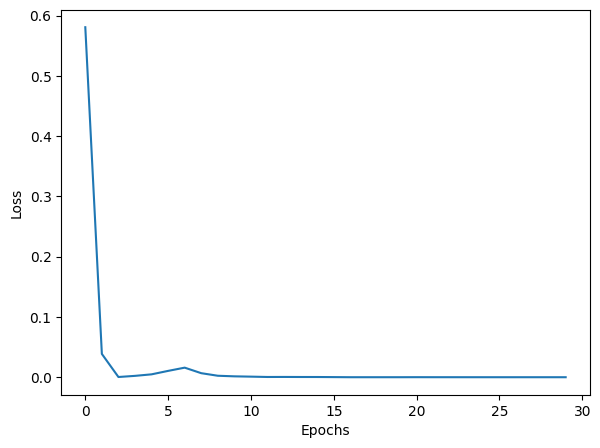

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(RNN.update)
plt.xlabel("Epochs")
plt.ylabel("Loss")

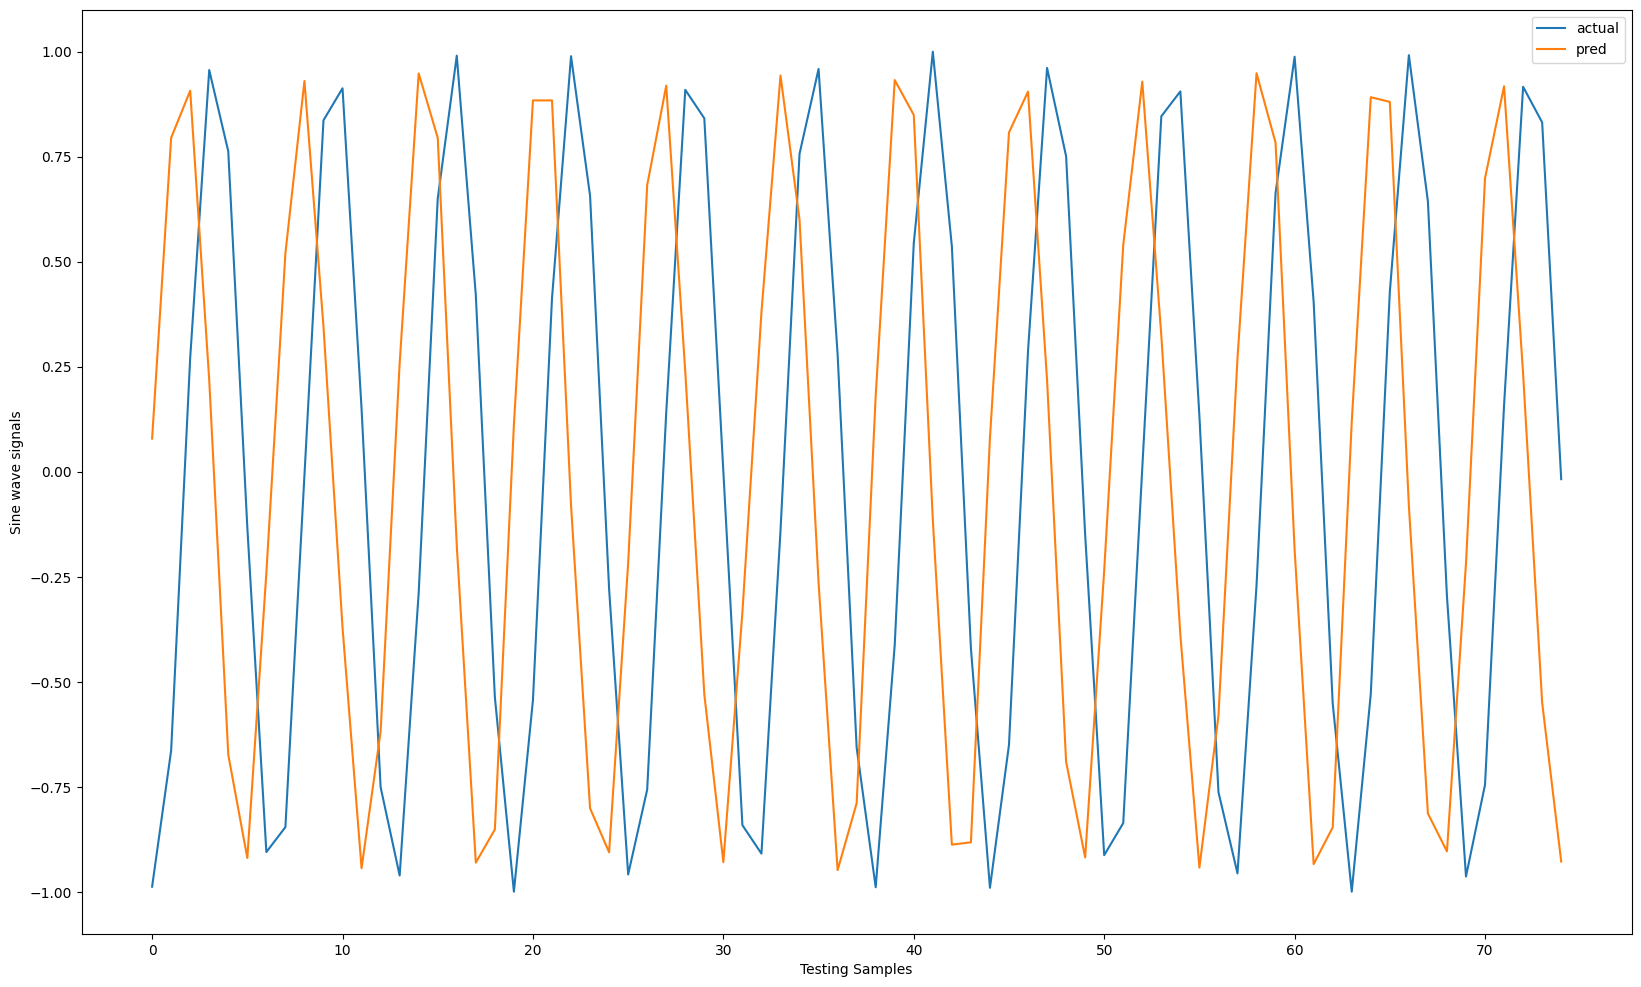

In [76]:
plt.figure(figsize=(20,12))
plt.plot(range(len(X_sample)),y_sample,label="actual")
plt.plot(range(len(X_sample)),pred,label="pred")
plt.xlabel("Testing Samples")
plt.ylabel("Sine wave signals")
plt.legend()